# <center>Modelisation d'une structure en 2D et 3D<center>

## Définition de l'étude

Dans cette partie du programme, vous avez accès à la définition de l'étude que se soit en 2D ou en 3D. Elle contient donc toutes les données nécessaires au bon fonctionnement des différents programmes que nous avons.

Cette structure se compose en deux grandes parties. La première partie ne contient que les informations nécessaires à la modélisation de la structure que l'on souhaite étudier en 2D. Alors que dans la seconde partie nous retrouverons tout ce qui concernera la modélisation en 3D de la même structure.

<table><tr> 
       <td> <img src="structure.jpeg" alt= "S" style="height: 300px;"/> </td> 
</tr></table>
<p style="text-align: center;">Fig.1 : Structure à modéliser.</p>



Ces deux parties contiennent pour autant une trame commune (sous forme de dictionnaire), c'est-à-dire qu'elle contienne toutes deux :
- la position de leurs points, 
- le nombre d'éléments de la structure ainsi que leurs degrés de liberté
- les conditions aux limites en contraintes et déplacement de la structure
- les propriétés du matériau ainsi que sa géométrie.

En revanche, ce qui va distinguer nos deux parties sont le nombre d'axes qui va leur être attribué.
Nous nous sommes aidées de :https://github.com/apf99/Truss-Modeling/blob/master/truss.py


In [1]:
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from numpy.linalg import norm
from scipy.linalg import eigh
import matplotlib.pyplot as plt 


In [2]:
def setup():
    # define the coordinate system
    x_axis = np.array([1,0,0])
    y_axis = np.array([0,1,0])
    z_axis = np.array([0,0,1])
    p      = 7.5
    g      = 16.5
    dimension = 3 # changer ici pour avoir soit 2D soit 3D
    
    
    print('dimension',dimension)
    if dimension == 2:
        x_axis = np.array([1,0])
        y_axis = np.array([0,1])
        
        # define the model
        nodes              = { 1:[0,0], 2:[0,p], 3:[g,0], 4:[g,p],5:[2*g,0],6:[2*g, p], 
                              7:[3*g,0],8:[3*g,p]} #add
        
        degrees_of_freedom = { 1:[1,2], 2:[3,4], 3:[5,6], 4:[7,8], 5:[9,10], 6:[11,12],
                              7:[13,14],8:[15,16] } #add
        
        elements           = { 1:[1,2], 2:[2,4], 3:[3,4], 4:[2,3], 5:[1,4], 6:[4,6], 
                              7:[5,6], 8:[6,8], 9:[7,8], 10:[6,7],11:[5,8]} #add
        
        restrained_dofs    = [1, 2, 5, 6, 9, 10, 13, 14]#add
        
        forces             = { 1:[0,0], 2:[0,-200], 3:[0,0], 4:[0,0], 5:[0,0], 
                              6:[0,0], 7:[0,0], 8:[0,0] }#add
    
        # material properties - AISI 1095 Carbon Steel (Spring Steel)
        densities   = {1:0.284, 2:0.284, 3:0.284, 4:0.284, 5:0.284, 6:0.284, 7:0.284, 
                       8:0.284, 9:0.284, 10:0.284, 11:0.284} #add
        
        stiffnesses = {1:30.0e6, 2:30.0e6, 3:30.0e6, 4:30.0e6, 5:30.0e6, 6:30.0e6,
                       7:30.0e6, 8:30.0e6, 9:30.0e6, 10:30.0e6, 11:30.0e6} #add
        
        # geometric properties
        areas = {1:1.0, 2:1.0, 3:1.0, 4:1.0, 5:1.0, 6:1.0, 7:1.0, 8:1.0, 9:1.0,
                 10:1.0, 11:1.0} #add
    
        ndofs = dimension * len(nodes)
    
        # assertions
        assert len(densities) == len(elements) == len(stiffnesses) == len(areas)
        assert len(restrained_dofs) < ndofs
        assert len(forces) == len(nodes)
    
        return {  'x_axis':x_axis, 'y_axis':y_axis, 'nodes':nodes,
                'degrees_of_freedom':degrees_of_freedom,   \
                  'elements':elements, 'restrained_dofs':restrained_dofs,
                'forces':forces, 'ndofs':ndofs,     \
                  'densities':densities, 'stiffnesses':stiffnesses,
                'areas':areas, 'dimension':dimension }
    
    elif dimension == 3:
        x_axis = np.array([1,0,0])
        y_axis = np.array([0,1,0])
        z_axis = np.array([0,0,1])
        
        # define the model
        nodes              = { 1:[0,0,0], 2:[0,p,0], 3:[g,0,0], 4:[g,p,0],5:[2*g,0,0],
                              6:[2*g, p,0], 7:[3*g,0,0], 8:[3*g,p,0], 9:[0,0,p],
                              10:[0,p,p], 11:[g,0,p], 12:[g,p,p], 13:[2*g,0,p],
                              14:[2*g, p,p], 15:[3*g,0,p], 16:[3*g,p,p]} #add
        
        degrees_of_freedom = { 1:[1,2,3], 2:[4,5,6], 3:[7,8,9], 4:[10,11,12], 
                              5:[13,14,15], 6:[16,17,18], 7:[19,20,21], 8:[22,23,24],
                              9:[25,26,27], 10:[28,29,30], 11:[31,32,33], 
                              12:[34,35,36], 13:[37,38,39], 14:[40, 41,42], 
                              15:[43,44,45], 16:[46,47,48]}#add
        
        elements           = { 1:[1,2], 2:[2,4], 3:[3,4], 4:[2,3], 5:[1,4], 6:[4,6], 7:[5,6], 8:[6,8], 9:[7,8], 10:[6,7],11:[5,8],
                          12:[9,10], 13:[10,12], 14:[11,12], 15:[10,11], 16:[9,12], 17:[12,14], 18:[13,14], 19:[14,16], 20:[15,16], 21:[14,15], 22:[13,16],
                          23 : [1,10], 24:[2,9], 25: [3,12], 26 :[4,11], 27:[5,14], 28:[6,13], 29 : [7,16], 30:[8,15],
                          31:[2,10],32:[4,12],33:[6,14], 34:[8,16]}
        
        restrained_dofs    = [1, 2, 3, 7, 8, 9, 13, 14,15, 19, 20, 21, 25, 26, 27, 31,
                              32, 33, 37, 38, 39, 43, 44, 45]#add
        
        forces             = { 1:[0,0,0], 2:[0,0,0], 3:[0,0,0], 4:[0,0,0], 5:[0,0,0],
                              6:[0,0,0], 7:[0,0,0], 8:[0,0,0], 9:[0,0,0], 10:[0,0,0],
                              11:[0,0,0], 12:[0,0,0], 13:[0,0,0], 14:[0,0,0], 
                              15:[0,0,0], 16:[0,0,0]}#add

        # material properties - AISI 1095 Carbon Steel (Spring Steel)
        densities   = {1:0.284, 2:0.284, 3:0.284, 4:0.284, 5:0.284, 6:0.284, 7:0.284,
                       8:0.284, 9:0.284, 10:0.284, 11:0.284,12:0.284, 13:0.284,
                       14:0.284, 15:0.284, 16:0.284, 17:0.284, 18:0.284, 19:0.284,
                       20:0.284, 21:0.284, 22:0.284, 23:0.284, 24:0.284, 25:0.284 ,
                       26:0.284, 27:0.284, 28:0.284, 29:0.284, 30:0.284, 31:0.284,
                       32:0.284, 33:0.284, 34:0.284} #add
        
        stiffnesses = {1:30.0e6, 2:30.0e6, 3:30.0e6, 4:30.0e6, 5:30.0e6, 6:30.0e6,
                       7:30.0e6, 8:30.0e6, 9:30.0e6, 10:30.0e6, 11:30.0e6, 12:30.0e6,
                       13:30.0e6, 14:30.0e6, 15:30.0e6, 16:30.0e6, 17:30.0e6,
                       18:30.0e6, 19:30.0e6, 20:30.0e6, 21:30.0e6, 22:30.0e6,
                       23:30.0e6, 24:30.0e6, 25:30.0e6, 26:30.0e6, 27: 30.0e6,
                       28:30.0e6, 29:30.0e6, 30:30.0e6, 31:30.0e6, 32:30.0e6,
                       33:30.0e6, 34:30.0e6 } #add
        
        # geometric properties
        areas = {1:1.0, 2:1.0, 3:1.0, 4:1.0, 5:1.0, 6:1.0, 7:1.0, 8:1.0, 9:1.0,
                 10:1.0, 11:1.0,12:1.0, 13:1.0, 14:1.0, 15: 1.0, 16:1.0, 17:1.0,
                 18:1.0, 19:1.0, 20:1.0, 21:1.0, 22:1.0, 23:1.0, 24:1.0, 25:1.0,
                 26:1.0, 27: 1.0, 28:1.0, 29:1.0, 30:1.0, 31:1.0, 32:1.0, 33:1.0,
                 34:1.0 } #add

        ndofs = dimension * len(nodes)
        # assertions
        assert len(densities) == len(elements) == len(stiffnesses) == len(areas)
        assert len(restrained_dofs) < ndofs
        assert len(forces) == len(nodes)
        
        return {  'x_axis':x_axis, 'y_axis':y_axis,'z_axis':z_axis, 'nodes':nodes,
                'degrees_of_freedom':degrees_of_freedom,   \
              'elements':elements, 'restrained_dofs':restrained_dofs, 'forces':forces,
                'ndofs':ndofs,     \
              'densities':densities, 'stiffnesses':stiffnesses,
                'areas':areas,'dimension':dimension }
   
    else:
        print('Dimmension doit-être de 2 ou 3 !') 



## Caractéristique de l'élément :
Ce programme a pour objectif de déterminer quels vont être les deux nœuds de l'élément. 

Afin d'y parvenir, nous extrayons du dictionnaire "properties" un élément, et ses nœuds. Nous sommes également capables de recueillir à la fois leurs coordonnées ainsi que leur degré de liberté.

In [3]:
def points(element, properties):
    elements = properties['elements']
    nodes = properties['nodes']
    degrees_of_freedom = properties['degrees_of_freedom']

    # find the nodes that the elements connects
    fromNode = elements[element][0]
    toNode = elements[element][1]

    # the coordinates for each node
    fromPoint = np.array(nodes[fromNode])
    toPoint = np.array(nodes[toNode])

    # find the degrees of freedom for each node
    dofs = degrees_of_freedom[fromNode]
    dofs.extend(degrees_of_freedom[toNode])
    dofs = np.array(dofs)
    return fromPoint, toPoint, dofs

## Rotation de matrices :

Nous nous intéressons dans cette partie à effectuer une rotation des projections d'axes.

Pour ce faire nous savons, que chaque élément n'est pas forcement positionné verticalement ou horizontalement. En effet, certains éléments de notre structure se trouvent souvent en diagonale. Pour effectuer ce changement de position, nous allons passer par un changement de la projection des axes qu'il soit en 2D ou en 3D.

Afin d'obtenir ce changement nous allons calculer le cosinus compris entre deux vecteurs pour cela, nous appliquerons la formule suivante :

$$ \frac {U \quad .\quad\mathrm{axes_{i}}}{\lvert U\lvert \quad* \quad\mathrm{ \lvert axes_{i}\lvert}}$$

<table><tr> 
       <td> <img src="Cos.png" alt= "Vue en 2D" style="height: 300px;"/> </td>
</tr></table>
<p style="text-align: center;">Fig.1 : Angle entre deux vecteurs .</p>

On peut utiliser cette approche pour effectuer notre rotation, grâce au "np.dot" qui permet de multiplier deux vecteurs entre eux. De plus, cette technique est d'autant plus pratique, car on peut aussi l'utiliser en 3D. En effet, cette formule d'angle fonctionne quel que soit l'axe pris.



In [4]:
def direction_cosine(vec1, vec2):
    return np.dot(vec1,vec2) / (norm(vec1) * norm(vec2))
    
def rotation_matrix(element_vector, x_axis, y_axis, z_axis, dimension):
    
    # find the direction cosines   
    x_proj = direction_cosine(element_vector, x_axis)
    y_proj = direction_cosine(element_vector, y_axis)
    
    if dimension == 2 :
         return np.array([[x_proj,y_proj,0,0],[0,0,x_proj,y_proj]])
    else:
        z_proj = direction_cosine(element_vector, z_axis)
        return np.array([[x_proj,y_proj,z_proj,0,0,0],[0,0,0,x_proj,y_proj,z_proj]])

## Tracer la structure souhaiter :

Dans cette fonction, nous cherchons à tracer notre structure. 
Cette méthode a deux utilités. La première est de pouvoir faire apparaître sur notre résultat finale la position des points de notre structure. La deuxième est de percevoir le comportement que peut avoir notre structure entre différents états : traction, compression, repos. 

Pour ce faire nous avons séparer le tracer de la structure en 2D et 3D, dû à l'axe en plus pour la 3D.

Intéressons-nous au tracer des points, afin d'y parvenir nous extrayons l'information sur la valeur des points du dictionnaire de "setup()" contenue dans "nodes".
En ce qui concerne le tracer des éléments nous pratiquons de la même manière. Nous cherchons les nœuds qui relient les éléments entre eux afin de pouvoir les relier ensemble. Nous y avons inclus une condition qui nous permet de savoir comment se comporte les éléments en fonction de la contrainte.

In [5]:
def draw(nodes,fromPoint, toPoint, element, areas, stress, dimension):
    
    x = [i[0] for i in nodes.values()]
    y = [i[1] for i in nodes.values()]

    x1 = fromPoint[0]
    y1 = fromPoint[1]
    
    x2 = toPoint[0]
    y2 = toPoint[1]
    

    if dimension == 2 :
        ax.scatter(x,y)
        
        #color blue = traction
        if (stress > 0):
           # print("hello")
            ax.plot( [x1, x2],[y1, y2], color='b', linestyle='-',
                    linewidth=areas[element],zorder=1)
            
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Y$')
            ax.text2D(0.05, 0.95, "2D", transform=ax.transAxes)

        
        #color red = compression
        elif (stress < 0):
            ax.plot( [x1, x2],[y1, y2], color='r', linestyle='-',
                    linewidth=areas[element],zorder=1)
            
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Y$')
            ax.text2D(0.05, 0.95, "2D", transform=ax.transAxes)

        #color green = repos
        else : 
            ax.plot( [x1, x2],[y1, y2], color='g', linestyle='-', 
                    linewidth=areas[element],zorder=1)
            
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Y$')
            ax.text2D(0.05, 0.95, "2D", transform=ax.transAxes)
 
    else :
        z = [i[2] for i in nodes.values()]
        ax.scatter(x,z,y)
        
        z1 = fromPoint[2]
        z2 = toPoint[2]
        
        #color blue = traction
        if (stress > 0):
           # print("hello")
            ax.plot( [x1, x2],[z1,z2],[y1, y2], color='b', linestyle='-', 
                    linewidth=areas[element],zorder=1)
            
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Z$')
            ax.set_zlabel('$Y$')
            ax.text2D(0.05, 0.95, "3D", transform=ax.transAxes)
        #color red = compression
        elif (stress < 0):
            ax.plot( [x1, x2],[z1,z2],[y1, y2], color='r', linestyle='-', 
                    linewidth=areas[element], zorder=1)
           
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Z$')
            ax.set_zlabel('$Y$')
            ax.text2D(0.05, 0.95, "3D", transform=ax.transAxes)
        #color green = repos
        else : 
            ax.plot( [x1, x2],[z1,z2],[y1, y2], color='g', linestyle='-', 
                    linewidth=areas[element], zorder=1)
            
            ax.set_xlabel('$X$')
            ax.set_ylabel('$Z$')
            ax.set_zlabel('$Y$',rotation=60)
            ax.text2D(0.05, 0.95, "3D", transform=ax.transAxes)



## Créations des matrices :

Dans cette partie nous nous intéressons à la création des matrices de raideur, de masse et de force.

Cette fonction se décompose en plusieurs étapes. La première consiste à initialiser les matrices K, M, F.
Pour parvenir à construire ces matrices, nous calculons localement les matrices des éléments, afin d'obtenir par un changement de localisation les matrices globales.

* Calcul des matrices locales :

Nous vous présentons la matrice de masse et de raideur pour un élément Bar (B2).

Matrice de masse : $ m =\begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix}\quad $ Coefficient $Cm = \frac{\rho * S * L}{6}$

Matrice de raideur : $k = \begin{pmatrix} 1 & -1 \\ -1 & 1 \end{pmatrix}\quad$ Coefficient  $Ck = \frac{E* Surface}{Longueur}$

Au commencement, il faut définir la géométrie des éléments. Pour se faire, nous récupérons ces données grâce à la fonction "point" créée précédemment. Cette fonction nous permet d'obtenir un vecteur pour chaque élément.

Pour chaque élément, ont calcul grâce à la fonction "point" le vecteur de l'élément.
Ensuite, l'objectif est d'effectuer une rotation des matrices, pour y parvenir, nous utilisons la fonction "rotation_matrix" conçu dans un autre module Jupiter. Il nous suffit à présent d'effectuer une rotation des matrices de raideur et de masse, pour y parvenir nous appliquons la formule suivante :

$$ \begin{cases}
m_{rotation} \quad= ~^t[\tau] * [m] *[\tau] \\
k_{rotation} \quad= ~^t[\tau] * [k] *[\tau]
\end{cases}
$$

On définit la matrice de localisation qui pour rôle de faire passer nos matrices $m_{rotation}\hspace{0.8cm} k_{rotation} \hspace{0.6cm}$ de local à global. Donc nous obtenons les matrices suivantes :

$$ \begin{cases}
M_{global}\quad = Cm * \left[ ~^t[B] * [m_{rotation}\quad] *[B]\right] \\
K_{global}\quad = Ck * \left[ ~^t[B] * [k_{rotation}\quad] *[B]\right]
\end{cases}
$$

* Construction de la matrice F :

Pour pouvoir construire la matrice de force F, on récupère les valeurs des forces contenue dans le dictionnaire "porperties" de forces.

* Prise en compte des conditions aux limites en déplacement :

On souhaite prendre en compte les conditions aux limites par la méthode du terme diagonale unité. Pour cela, nous identifions les degrés de liberté (ddls) connus. La matrice de rigidité du système réduit à moins les ddls connus. Le second membre ne subit qu’une réorganisation, c'est-à-dire que nous retirons tous les déplacements imposés nuls.

In [6]:
def get_matrices(properties):
    # construct the global mass and stiffness matrices
    ndofs    = properties['ndofs']
    nodes    = properties['nodes']
    elements = properties['elements']
    forces   = properties['forces']
    areas    = properties['areas']
    x_axis   = properties['x_axis']
    y_axis   = properties['y_axis']
    
    degrees_of_freedom = properties['degrees_of_freedom']
    dimension = properties['dimension']
    
    if dimension == 3:
        z_axis   = properties['z_axis']
    #plot_nodes(nodes,dimension)
    #draw(nodes, fromPoint, toPoint, element, areas, stress, dimension)

    M = np.zeros((ndofs,ndofs))
    K = np.zeros((ndofs,ndofs))

    for element in elements:
        # find the element geometry
        fromPoint, toPoint, dofs = points(element, properties)
        element_vector = toPoint - fromPoint

        #draw_element(fromPoint, toPoint, element, areas, dimension)   # display the element
        #draw(nodes, fromPoint, toPoint, element, areas, stress, dimension)
        #print('e_v',element_vector)
        
        
        dof=[]
        dof.extend(degrees_of_freedom[elements[element][0]][0:dimension])
        dof.extend(degrees_of_freedom[elements[element][1]][0:dimension])
        dof = np.array(dof)
        
        # find element mass and stiffness matrices
        length = norm(element_vector)
        #print('l',length)
        rho    = properties['densities'][element]
        area   = properties['areas'][element]
        E      = properties['stiffnesses'][element]

        Cm = rho * area * length / 6.0
        Ck = E * area / length

        m = np.array([[2,1],[1,2]]) 
        k = np.array([[1,-1],[-1,1]])

        # find rotated mass and stiffness element matrices
        if dimension == 2:
            tau = rotation_matrix(element_vector, x_axis, y_axis,0,dimension)
        
        elif dimension == 3 :
            #print('hello')
            tau = rotation_matrix(element_vector, x_axis, y_axis, z_axis,dimension)
            #print('sort')

        #print('t',tau)
        m_r = tau.T.dot(m).dot(tau)
        k_r = tau.T.dot(k).dot(tau)
        
        # change from element to global coordinates
        #index = dofs-1
        dof = dof-1
        B = np.zeros((dimension*2,ndofs))
        for i in range(dimension*2):
            B[i,dof[i]] = 1.0
       # if (element==1):
           # print(B)
                
        M_rG = B.T.dot(m_r).dot(B)
        K_rG = B.T.dot(k_r).dot(B)
        M += Cm * M_rG
        K += Ck * K_rG
        #print('dof',dof)
    # construct the force vector
    F = []
    for f in forces.values():
        F.extend(f)
    F = np.array(F)

    # remove the restrained dofs
    remove_indices = np.array(properties['restrained_dofs']) - 1
    for i in [0,1]:
        M = np.delete(M, remove_indices, axis=i)
        K = np.delete(K, remove_indices, axis=i)

    F = np.delete(F, remove_indices)    
    return M, K, F

## Calcul des contraintes :

L'objectif de cette partie est de calculer la matrice des contraintes. 

Afin d'y parvenir, nous décomposons notre fonction en plusieurs étapes.

* Calcul du vecteur de déplacement :

Nous débutons par réorganiser le déplacement en rajoutant les déplacements que nous avions annulé dans la section "création des matrices".
Ensuite, nous calculons pour chaque élément son vecteur grâce au dictionnaire "points". Ce qui nous permet de pouvoir effectuer une rotation des matrices en utilisant la fonction "rotation_matrix". 
Il nous suffit alors d'appliquer un déplacement global pour pouvoir avoir le vecteur déplacement tel que :
$$ q = rotation_{element}\;\;*\;\;deplacement_{global} $$

* Calcul de l'allongement relatif :

Le principe de l'allongement relatif est de savoir la variation de longueur de chaque élément, autrement dit de savoir la déformation physique de l'élément. Pour cela, on applique la formule suivante :
$$ \epsilon = \frac{dl-dl_0}{dl-0}$$
Soit dans notre cas : 
$$ \epsilon = \frac{\Delta q}{\lvert vecteur_{element}\;\;\;\lvert}$$

* Calcul de la contrainte :

Il ne reste plus que le calcul de la contrainte, comme nous le savons la contrainte a pour expression :
$$\sigma = E * \epsilon$$
N'oublions pas que chaque module de Young est associé à l'élément qui lui correspond.




In [7]:
def get_stresses(properties, X):

    x_axis    = properties['x_axis']
    y_axis    = properties['y_axis']
    elements  = properties['elements']
    E         = properties['stiffnesses']
    areas     = properties['areas']
    nodes     = properties['nodes']
    dimension = properties['dimension']
    ndofs    = properties['ndofs']
    rdof = properties['restrained_dofs']
    if dimension == 3:
        z_axis    = properties['z_axis']
        
        
     
    displacement = np.zeros((int(ndofs/dimension),dimension))
    n=0
    c=0
    for i in range(len(displacement)):
        for j in range(len(displacement[0])):
            r=0
            c+=1
            for k in rdof:
                if c == k:
                    displacement[i,j]=0
                    r=1
                    break
            if r==0:
                displacement[i,j] = X[n]
                n+=1
                
    # find the stresses in each member
    stresses = []
    for element in elements:
        # find the element geometry
        fromPoint, toPoint, dofs = points(element, properties)
        element_vector = toPoint - fromPoint
        point1 =elements.get(element)[0]-1
        point2 =elements.get(element)[1]-1
        
        # find rotation matrix
        if dimension == 2:
            tau = rotation_matrix(element_vector, x_axis, y_axis, 0, dimension)
            global_displacements = np.array([displacement[point1,0],
                                             displacement[point1,1],
                                             displacement[point2,0],
                                             displacement[point2,1]])
            q = tau.dot(global_displacements)
       
        else:
            tau = rotation_matrix(element_vector, x_axis, y_axis, z_axis, dimension)
            global_displacements = np.array([displacement[point1,0],
                                             displacement[point1,1],
                                             displacement[point1,2],
                                             displacement[point2,0],
                                             displacement[point2,1],
                                             displacement[point2,2]])        
            q = tau.dot(global_displacements)

        # calculate the strains and stresses
        strain = (q[1] - q[0]) / norm(element_vector)
        stress = E[element] * strain
        stresses.append(stress)

        # display the element
        draw(nodes,fromPoint, toPoint, element, areas, stress, dimension)

    #print("fini")
    return stresses

## Résultats :

Cette partie a pour but, de montrer les résultats des différentes fonctions que nous avons crées. Il nous permet donc de savoir combien vaut:

* le deplacement de chaques noeuds
* la contrainte
* les fréquences de vibrations de la structures

In [8]:
def show_results(X, stresses, frequencies):

    print ('Nodal Displacments:', X)
    print ('Stresses:', stresses)
    print ('Frequencies:', frequencies)

## Programme principal :

Cette partie, est notre programme principal. 
Vous trouverez donc uniquement des appel aux différentes fonctions que nous vous avons explicitées.

Cette répartition en différents sous-programmes a pour objectif de mieux structuré, de mieux comprendre.

dimension 3
Nodal Displacments: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Stresses: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Frequencies: [ 511.65662298  514.78328264  804.22993003  806.67609991  867.18563694
  867.26231819  867.49438368  868.33564586 1275.71467081 1276.45136024
 1574.78309784 1575.11021057 1968.02946843 1983.65992501 1988.17511381
 2006.37838073 2032.89141052 2064.01626594 2102.74946407 2143.17394896
 3662.05406349 3672.34984636 3698.62182757 3712.35800753]


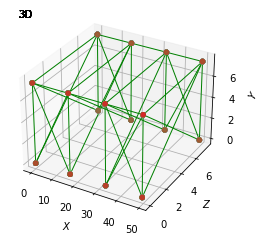

In [9]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
def main():

    # problem setup
    properties = setup()
    
    # determine the global matrices
    M, K, F = get_matrices(properties)
    
    #print(len(K))
    #print("diagonal", K.diagonal())
    #print("F",F)

    # find the natural frequencies
    evals, evecs = eigh(K,M)
    frequencies = np.sqrt(evals)

    # calculate the static displacement of each element
    X = np.linalg.inv(K).dot(F)
    #print('X',X)
    
    # determine the stresses in each element
    stresses = get_stresses(properties, X)
    #print(stresses)
    
    # output results
    show_results(X, stresses, frequencies)

if __name__ == '__main__':
    main()

## Vérification : 
Nous vous montrons dans cette partie, la vérification de la structure en 2D d'après https://valdivia.staff.jade-hs.de/fachwerk_en.html
<table><tr> 
       <td> <img src="posi.jpeg" alt= "Vue en 2D" style="height: 200px;"/> </td>
</tr></table>
<p style="text-align: center;">Fig.1 : Vue en plan.</p>
<table><tr>     
    <td> <img src="solu2.jpeg" alt= "Vue en 2D" style="height: 400px;"/> </td>
    <td> <img src="0001.jpg" alt= "Vue en 2D" style="height: 400px;"/> </td>
    
</tr></table>

<p style="text-align: center;">Fig.2 : Modélisation en 2D de la structure vérifiée.</p>